In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [136]:
df.shape

(45000, 14)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

ubah data type person age menjadi integer

In [138]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int32')

In [139]:
df.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

In [140]:
# Remove duplicated data
df.duplicated().sum()

0

In [141]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Mengambil kolom kategorikal
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Menampilkan kolom-kolom kategorikal dan numerik
print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numeric: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [142]:
df[num_cols].describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Analysis:
- terdapat data aneh dalam person age = 144
- person work experience 125 tahun
- max dari person_income jauh diatas rata-rata.

cek apakah ada employee experience yang lebih besar dari age nya

In [143]:
df[(df['person_age'] <= df['person_emp_exp'])]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


cek data dimana age di atas 100 tahun

In [144]:
df[(df['person_age'] >= 100)]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144,female,Associate,NaN,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


kemungkinan kecil sekali untuk orang diatas umur 100 tahun untuk meminjam loan ke bank lagi

In [145]:
df[(df['loan_percent_income'] >= 0.6)]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
571,21,female,Associate,24468.0,0,MORTGAGE,15000.0,EDUCATION,9.64,0.61,2.0,548,No,1
577,26,male,High School,32325.0,4,RENT,20050.0,EDUCATION,9.76,0.62,2.0,652,No,1
640,22,female,Associate,24993.0,1,MORTGAGE,16600.0,PERSONAL,9.76,0.66,3.0,634,Yes,0
18203,30,male,Bachelor,39324.0,8,RENT,24250.0,PERSONAL,11.12,0.62,5.0,671,No,1
23727,32,female,Associate,15340.0,10,RENT,9325.0,MEDICAL,8.38,0.61,6.0,673,No,1
36716,24,female,Bachelor,25087.0,3,OWN,15900.0,MEDICAL,9.92,0.63,4.0,603,Yes,0


loan percent income yang lebih dari 0.6 (cukup tinggi) normal karena masuk akal.

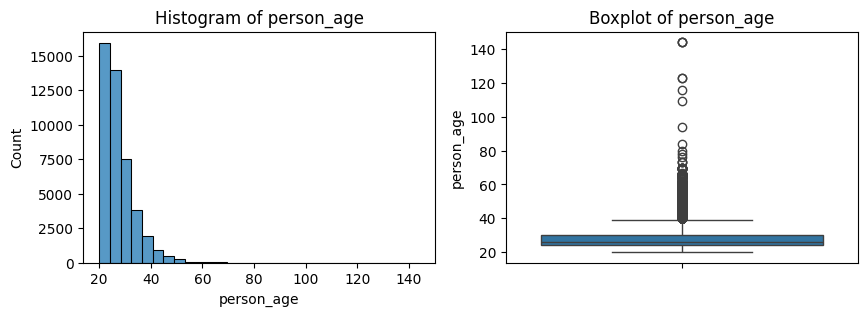

person_age - Skewness: 2.5481540050382425
person_age - Kurtosis: 18.64944898184852


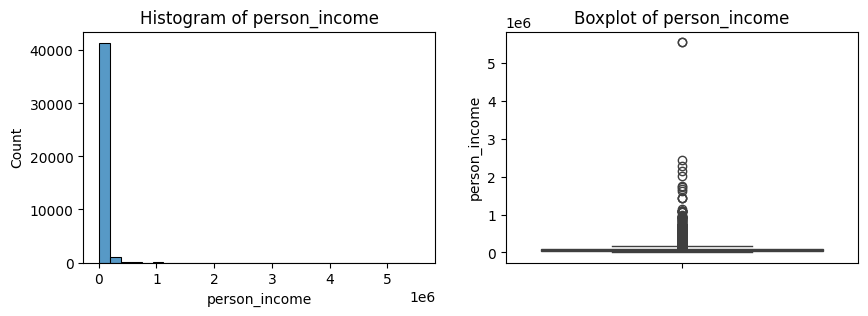

person_income - Skewness: 25.60673912825341
person_income - Kurtosis: 1569.8526113553646


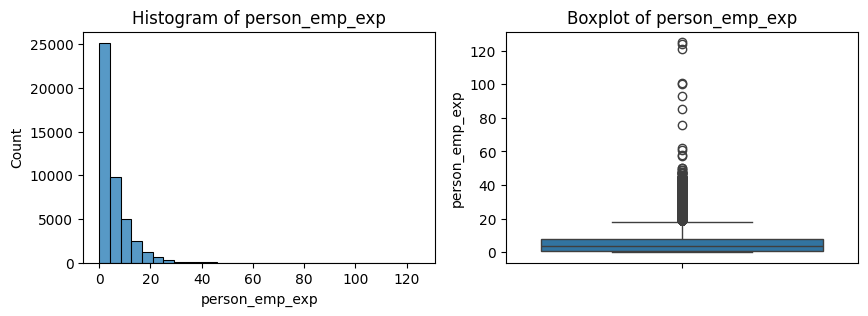

person_emp_exp - Skewness: 2.5949173726318255
person_emp_exp - Kurtosis: 19.1683237539473


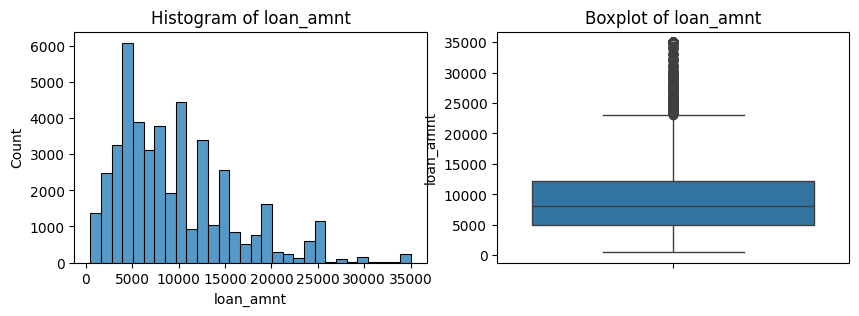

loan_amnt - Skewness: 1.1797312856279223
loan_amnt - Kurtosis: 1.3512152308228198


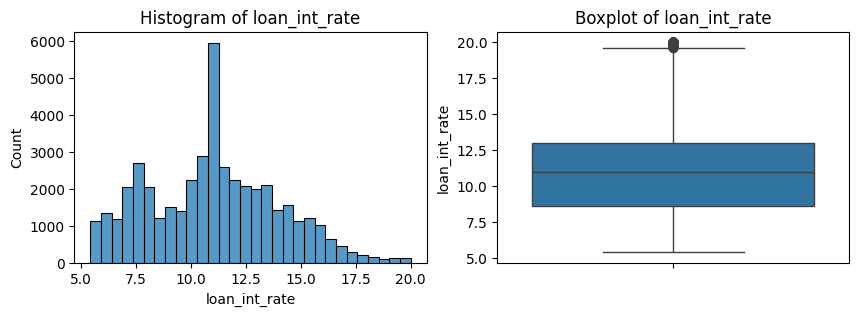

loan_int_rate - Skewness: 0.21378407238735642
loan_int_rate - Kurtosis: -0.42033530822379506


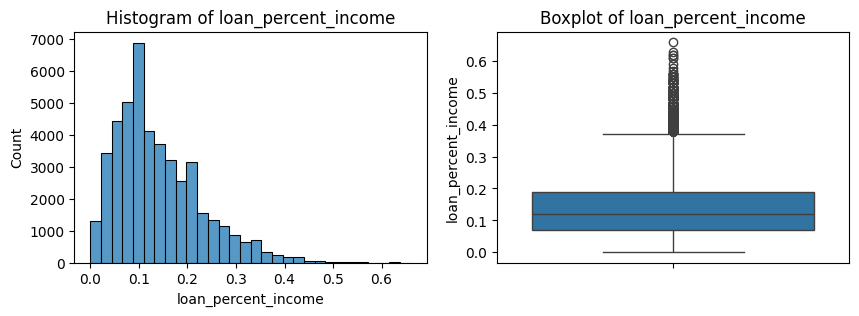

loan_percent_income - Skewness: 1.034512151182724
loan_percent_income - Kurtosis: 1.0824162412535965


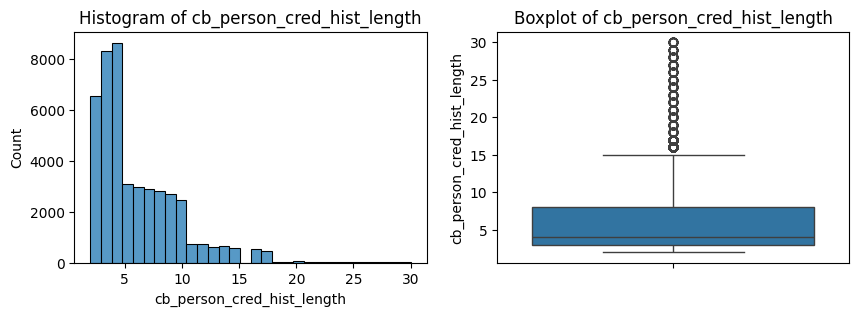

cb_person_cred_hist_length - Skewness: 1.6317199538415355
cb_person_cred_hist_length - Kurtosis: 3.725944524091197


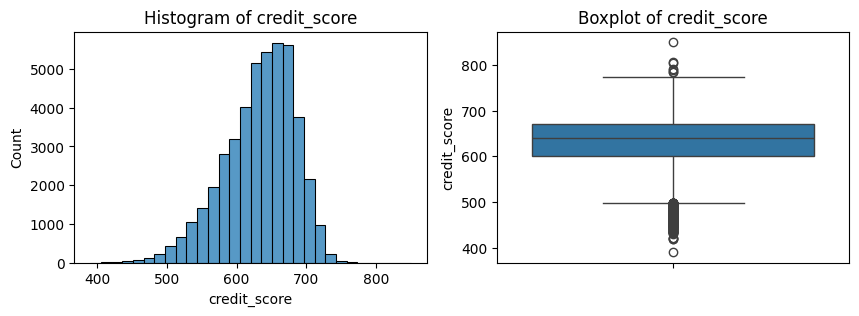

credit_score - Skewness: -0.6102608322577946
credit_score - Kurtosis: 0.20302185635702363


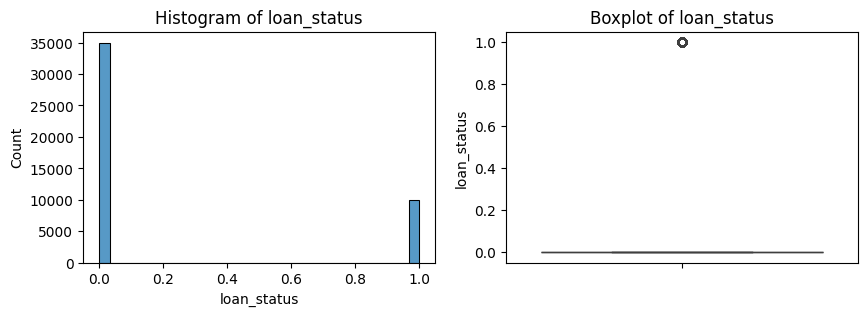

loan_status - Skewness: 1.3363507549997484
loan_status - Kurtosis: -0.21417618052832044


In [146]:
import seaborn as sns

# Check outlier and distribution
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')
        
check_distribution_outliers(df[num_cols], num_cols)

cek data uniqueness dan distribusinya

In [147]:
for col in cat_cols:
    print(f'Distribution for {col}:')
    print(pd.crosstab(index=df[col], columns='count'))
    print('\n')

Distribution for person_gender:
col_0          count
person_gender       
Male              45
fe male           45
female         20111
male           24799


Distribution for person_education:
col_0             count
person_education       
Associate         12028
Bachelor          13399
Doctorate           621
High School       11972
Master             6980


Distribution for person_home_ownership:
col_0                  count
person_home_ownership       
MORTGAGE               18489
OTHER                    117
OWN                     2951
RENT                   23443


Distribution for loan_intent:
col_0              count
loan_intent             
DEBTCONSOLIDATION   7145
EDUCATION           9153
HOMEIMPROVEMENT     4783
MEDICAL             8548
PERSONAL            7552
VENTURE             7819


Distribution for previous_loan_defaults_on_file:
col_0                           count
previous_loan_defaults_on_file       
No                              22142
Yes                     

In [148]:
df.nunique()

person_age                           60
person_gender                         4
person_education                      5
person_income                     32637
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

terlihat ada beberapa anomali seperti:
- 'fe male', 'female', 'male', dan 'Male'.

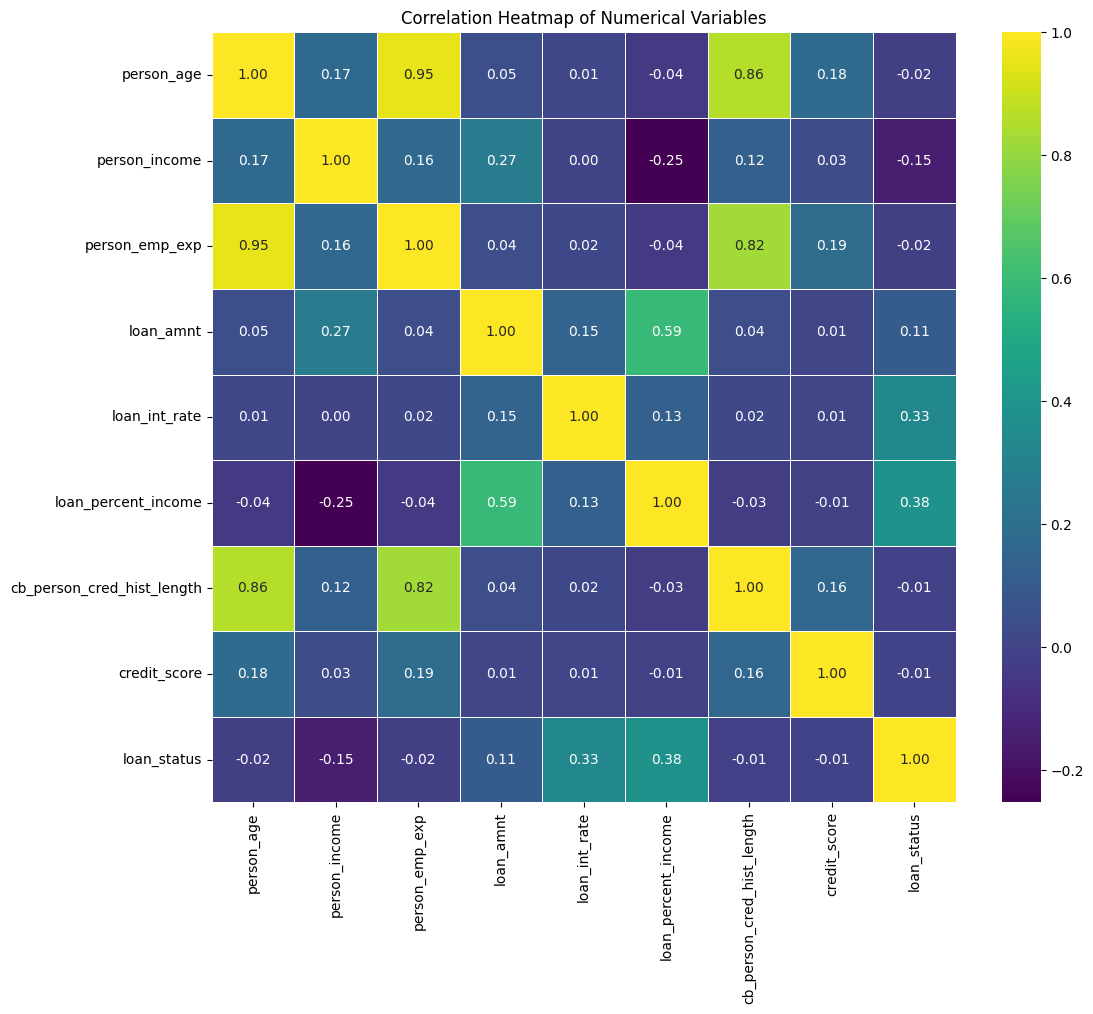

In [ ]:
num_cols = df.select_dtypes(include='number')

# matriks korelasi
corr_matrix = num_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

DATA PRE PROCESSING

map abnormalities seperti pada column gender

In [150]:
gender_mapping = {
    'fe male': 'female',
    'female': 'female',
    'male': 'male',
    'Male': 'male'
}
df['person_gender'] = df['person_gender'].map(gender_mapping)

# Convert
df['person_home_ownership'] = df['person_home_ownership'].str.lower()
df['loan_intent'] = df['loan_intent'].str.lower()

In [ ]:
# knowledge umum: human age realistically between 18and 100
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 100)]
df.shape

(44993, 14)

buang 'other' pada 'person_home_ownership' karena kurang jelas dan hanya sedikit

In [152]:
df = df[df['person_home_ownership'] != 'other']
print(df['person_home_ownership'].unique())

['rent' 'own' 'mortgage']


replace na values pada person_income dengan median

In [153]:
df['person_income'].fillna(df['person_income'].median(), inplace=True)
df.head()

C:\Users\b705h\AppData\Local\Temp\ipykernel_19620\2940647276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_income'].fillna(df['person_income'].median(), inplace=True)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,No,1


In [154]:
df = df[df['person_age'] <= 100]

ENCODING

- encode column seperti 'person_education', 'loan_intent','person_home_ownership' menggunakan one hot encoding karena data tidak menunjukan level.
- pakai label encoding untuk encode column previous_loan_defaults_on_file

In [159]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,No,1


In [162]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44876.000000,4.487600e+04,44876.000000,44876.000000,44876.000000,44876.000000,44876.000000,44876.000000,44876.000000
mean,27.750646,7.924502e+04,5.395891,9578.746769,11.003772,0.139685,5.867880,632.598182,0.221967
std,5.908426,6.139376e+04,5.926139,6315.157769,2.979698,0.087193,3.876982,50.398609,0.415574
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.869700e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.328275e+04,8.000000,12200.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


In [120]:
# Import libraries for encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Inisialisasi encoder tanpa drop
ohe_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
bin_enc = LabelEncoder()

# Lakukan one-hot encoding pada kolom kategorikal
one_hot_encoded = ohe_enc.fit_transform(df[['person_education', 'loan_intent','person_home_ownership']])

# Buat DataFrame dengan kolom yang telah di-encode
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['person_education', 'loan_intent', 'person_home_ownership']))

# Gabungkan DataFrame yang di-encode dengan DataFrame asli
df = df.join(one_hot_df)

# Hapus kolom kategorikal yang asli
df.drop(columns=['person_education', 'loan_intent', 'person_home_ownership'], inplace=True)

# Fit transform kolom gender dengan label encoder
df['person_gender'] = bin_enc.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = bin_enc.fit_transform(df['previous_loan_defaults_on_file'])
# Tampilkan data
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_Master,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture,person_home_ownership_mortgage,person_home_ownership_own,person_home_ownership_rent
0,22,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,21,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,23,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,24,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [121]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                  'credit_score']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

SPLIT DATA

In [122]:
from sklearn.model_selection import train_test_split

X =df.drop('loan_status',axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Training
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
print("🔍 Random Forest Evaluation:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))


🔍 Random Forest Evaluation:
[[6825  152]
 [ 521 1478]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6977
           1       0.91      0.74      0.81      1999

    accuracy                           0.93      8976
   macro avg       0.92      0.86      0.88      8976
weighted avg       0.92      0.93      0.92      8976

ROC AUC Score: 0.8587919084954544


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Training
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
print("🔍 Random Forest Evaluation:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))


🔍 Random Forest Evaluation:
[[6820  157]
 [ 503 1496]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6977
           1       0.91      0.75      0.82      1999

    accuracy                           0.93      8976
   macro avg       0.92      0.86      0.89      8976
weighted avg       0.93      0.93      0.92      8976

ROC AUC Score: 0.8629358394260912


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Training
xgb_model.fit(X_train, y_train)

# Prediksi
xgb_pred = xgb_model.predict(X_test)

# Evaluasi
print("🔍 XGBoost Evaluation:")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_pred))

c:\Users\b705h\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 XGBoost Evaluation:
[[6782  195]
 [ 406 1593]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6977
           1       0.89      0.80      0.84      1999

    accuracy                           0.93      8976
   macro avg       0.92      0.88      0.90      8976
weighted avg       0.93      0.93      0.93      8976

ROC AUC Score: 0.8844747370101849


fine tuning XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# scale_pos_weight = (jumlah negatif) / (jumlah positif)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=params_xgb, n_iter=30, cv=3, scoring='f1', n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\b705h\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6977
           1       0.83      0.85      0.84      1999

    accuracy                           0.93      8976
   macro avg       0.90      0.90      0.90      8976
weighted avg       0.93      0.93      0.93      8976

